# HSV Space Preprocessing
For the Peak-Renewables project, after detecting the board on the conveyor, further pre-processing can be done on the image to emphasize the edges.
The goal of this notebook is to experiment with the HSV color space and determine if any one of the HSV channels can be modified to help identify edges.

## What is the HSV space?

HSV stands for Hue, Saturation, and Value. These represent color, greyness, and brightness of an image respectively. For any given pixel, a 3 dimensional hsv vector is given.

## This Notebook
Since we want to experiment with the HSV space, each channel is individually modified with a function, and the binary images are shown for each step as binarizing will absolutely be a pre-processing step.

The binarize_img function will be used to smoothen the image with a gaussian blur and convert the image to binary.

Firstly, I import the required modules


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

Then I define a function to binarize the image. It takes in the image and a threshold value, and returns the binary image.

In [5]:
def binarize_img(img, thresh=100):
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    __, thresh = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY) #after some testing, 100 seems to be the best threshold value
    return thresh

Next I read the image and present it.

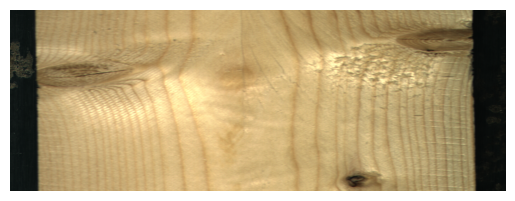

In [6]:
img_path = r'..//images//samples//99300070.bmp'
img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

###  Modifying the Value

The value in HSV has a range from 0 to 255.

In [7]:
#scaling the image to 50% of its original size

def increase_brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return image

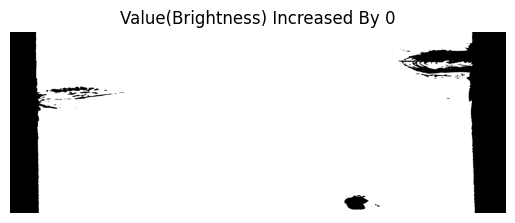

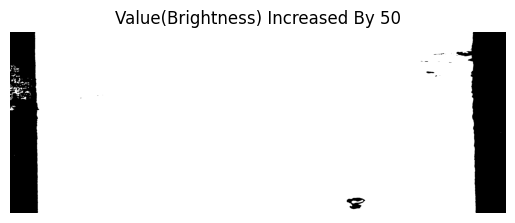

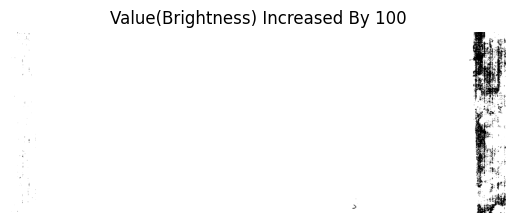

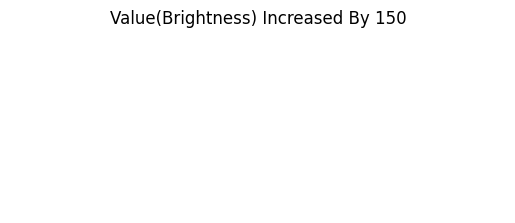

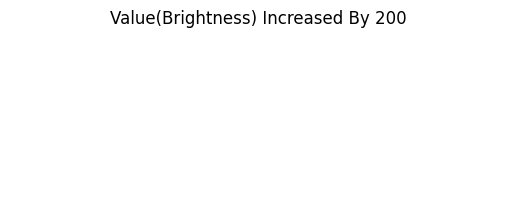

In [8]:
hsv = []

for i in range(0, 5):
    copy = img.copy()
    copy = increase_brightness(copy, 50*i)
    # Since brightness not working as expected, I want to see what is happening in HSV space
    hsv.append(cv2.cvtColor(copy, cv2.COLOR_BGR2HSV))

    thresh = binarize_img(copy)

    plt.axis('off')
    plt.title("Value(Brightness) Increased By {}".format(50*i))
    plt.imshow(thresh, cmap='gray',vmin=0,vmax=255)
    plt.show()

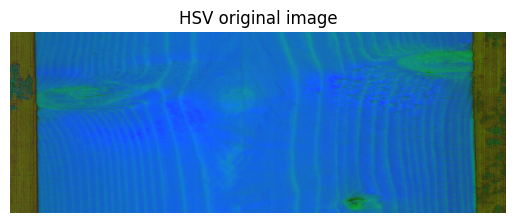

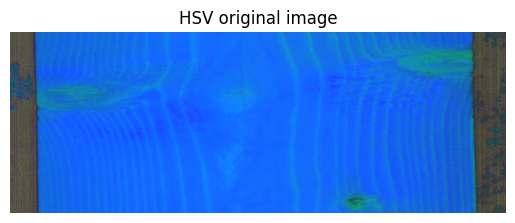

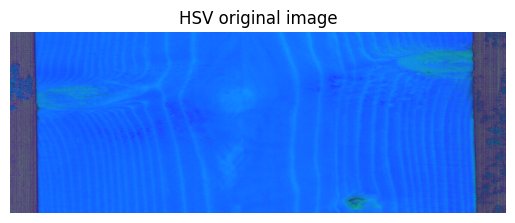

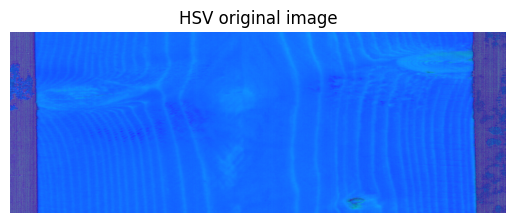

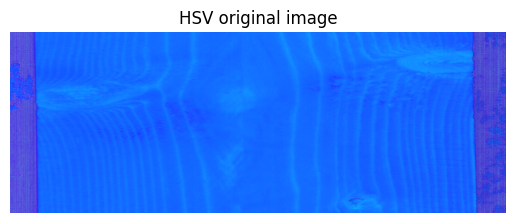

In [9]:
for img in hsv:
    plt.axis('off')
    plt.title("HSV original image")
    plt.imshow(img, cmap='hsv')
    plt.show()

### Modifying the Hue

The hue in HSV has a range from 0 to 179. It represents the colour of the image.

In [10]:
def increase_hue(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 179 - value
    h[h > lim] = 179
    h[h <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return image

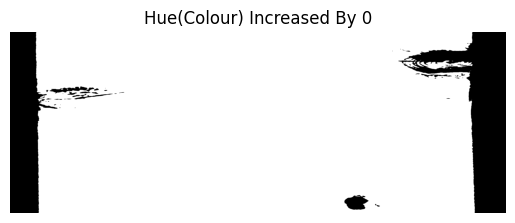

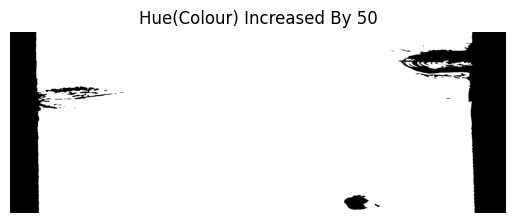

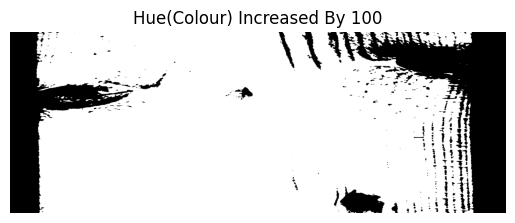

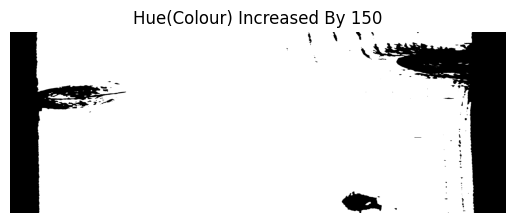

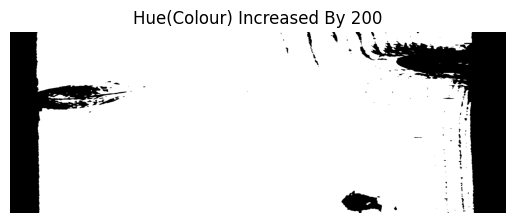

In [11]:
img_path = r'..//images//samples//99300070.bmp'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hsv = []
for i in range(0, 5):
    copy = img.copy()
    copy = increase_hue(copy, 50*i)

    hsv.append(cv2.cvtColor(copy, cv2.COLOR_BGR2HSV))

    thresh = binarize_img(copy)

    plt.axis('off')
    plt.title("Hue(Colour) Increased By {}".format(50*i))
    plt.imshow(thresh, cmap='gray',vmin=0,vmax=255)
    #plt.imshow(copy)
    plt.show()

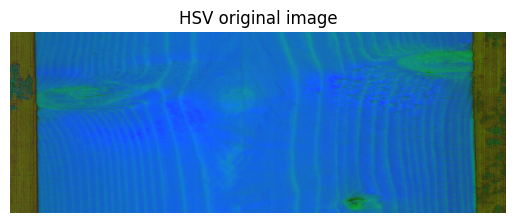

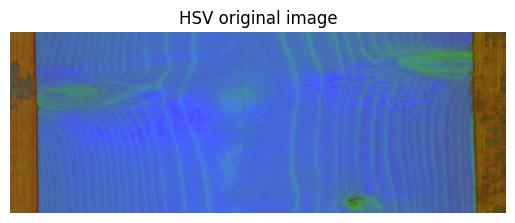

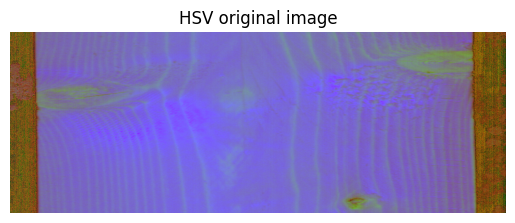

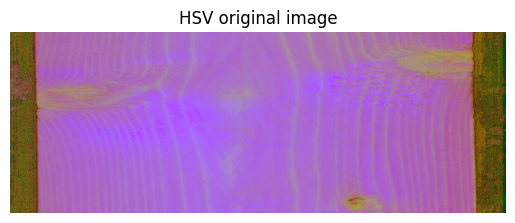

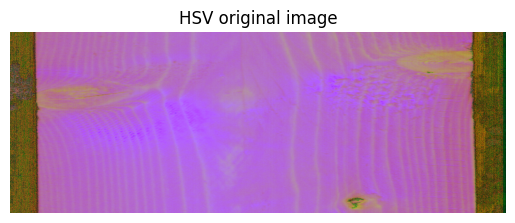

In [12]:
for img in hsv:
    plt.axis('off')
    plt.title("HSV original image")
    plt.imshow(img, cmap='hsv')
    plt.show()

### Modifying the Saturation

The saturation in HSV has a range from 0 to 179. It represents the greyness of a pixel.

In [13]:
def increase_saturation(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    s[s > lim] = 255
    s[s <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return image

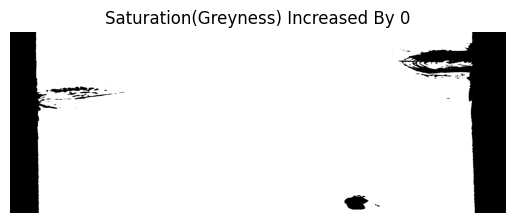

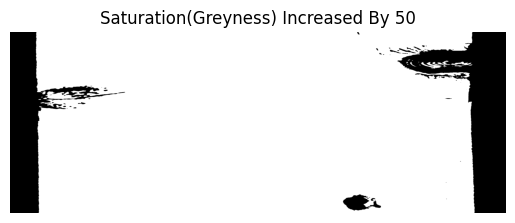

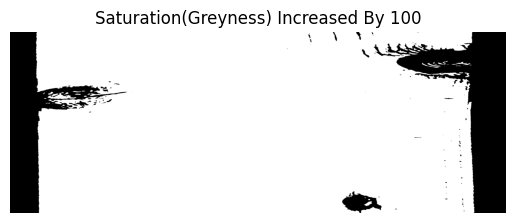

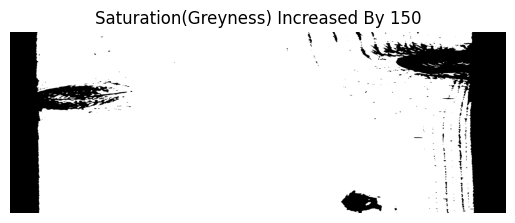

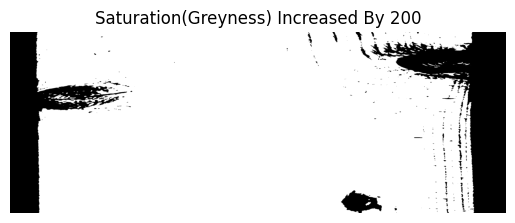

In [14]:
img_path = r'..//images//samples//99300070.bmp'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


for i in range(0, 5):
    copy = img.copy()
    copy = increase_saturation(copy, 50*i)

    thresh = binarize_img(copy)

    plt.axis('off')
    plt.title("Saturation(Greyness) Increased By {}".format(50*i))
    plt.imshow(thresh, cmap='gray',vmin=0,vmax=255)
    plt.show()

## Conclusion

It appears that increasing the hue and saturation can help identify objects on the board, but they also increase the noise within the image. increasing the value (or brightness) appears to have no advantageous effect on the image. The saturation appears to be the best way to aid in identifying objects on the board.



## Scaling instead of Linear increases

In [15]:
def scale_h(hsv, scale):
    h, s, v = cv2.split(hsv)
    h = h*scale
    fin = cv2.merge((h, s, v))

    return cv2.normalize(fin, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

def scale_s(hsv, scale):
    h, s, v = cv2.split(hsv)
    s = s*scale
    fin = cv2.merge((h, s, v))
    return cv2.normalize(fin, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

def scale_v(hsv, scale):
    h, s, v = cv2.split(hsv)
    v = v*scale
    fin = cv2.merge((h, s, v))
    return cv2.normalize(fin, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)


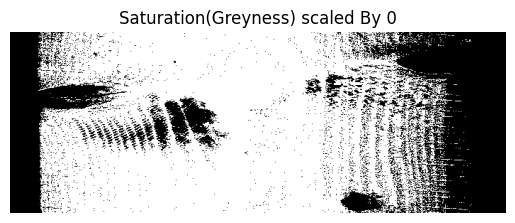

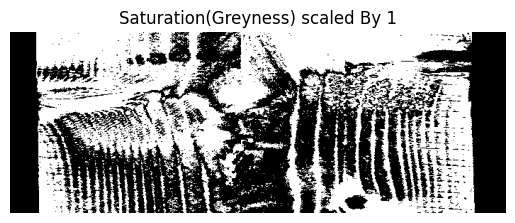

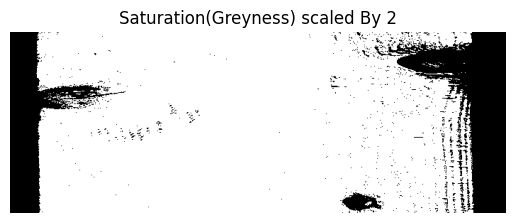

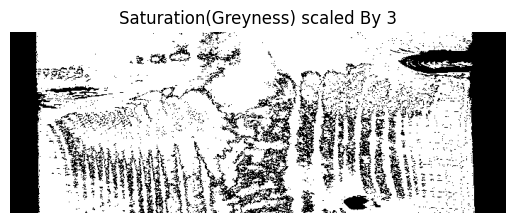

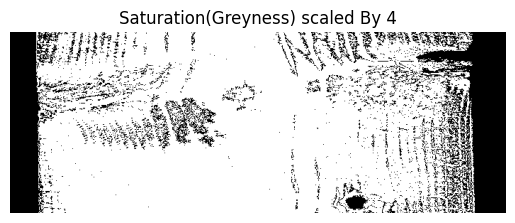

In [26]:
img_path = r'..//images//samples//99300070.bmp'
img = cv2.imread(img_path, cv2.COLOR_BGR2HSV)

for i in range(0, 5):
    copy = img.copy()
    copy = scale_h(copy,i)
    bgr = cv2.cvtColor(copy, cv2.COLOR_HSV2BGR)
    __, thresh = cv2.threshold(cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_BINARY)

    plt.axis('off')
    plt.title("Saturation(Greyness) scaled By {}".format(i))
    plt.imshow(thresh, cmap='gray')
    plt.show()